In [180]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

# All features - ExtraTrees

In [181]:
df = pd.read_csv("data/preprocessed/spotify-data-preprocessed.csv", index_col=0)

# Exclude the labels
X = df.iloc[:,:-4].to_numpy()

# Un-one-hot-encode the labels
y = df[["is_happy", "is_sad", "is_angry", "is_relaxed"]].to_numpy()
y = np.array([np.argmax(x) for x in y])

# K-Fold
skf = StratifiedKFold(n_splits=5)
accs = []
confs = []

# Training / Testing
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index ], y[test_index]

    model = ExtraTreesClassifier(n_estimators=420)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accs += [accuracy_score(y_test, y_pred)]
    # confs += [confusion_matrix(y_test, y_pred)]
print(f"Average accuracy: {np.mean(accs)}")
# print(f"Average confusion matrix: {np.sum(confs, axis=0) / skf.get_n_splits()}")

Average accuracy: 0.6477576601671309


array([[65.8,  1.8, 10. , 10.8],
       [ 6.2, 43.4,  9. , 31.2],
       [12.2,  6.4, 68.6,  2.8],
       [11.4, 20.4,  3. , 56.4]])

# Drop valence and energy - Extra Trees

In [182]:
# Exclude the labels
X = df.iloc[:,:-4]
X = X.drop(["valence", "energy"], axis=1).to_numpy()

# Un-one-hot-encode the labels
y = df[["is_happy", "is_sad", "is_angry", "is_relaxed"]].to_numpy()
y = np.array([np.argmax(x) for x in y])

# K-Fold
skf = StratifiedKFold(n_splits=5)
accs = []

# Training / Testing
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index ], y[test_index]

    model = ExtraTreesClassifier(n_estimators=420)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accs += [accuracy_score(y_test, y_pred)]
print(f"Average accuracy: {np.mean(accs)}")

Average accuracy: 0.6221448467966574


# All Features - Logistic Regression

In [183]:
# Exclude the labels
X = df.iloc[:,:-4].to_numpy()

# Un-one-hot-encode the labels
y = df[["is_happy", "is_sad", "is_angry", "is_relaxed"]].to_numpy()
y = np.array([np.argmax(x) for x in y])

# K-Fold
skf = StratifiedKFold(n_splits=5)
accs = []

# Training / Testing
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index ], y[test_index]

    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accs += [accuracy_score(y_test, y_pred)]
print(f"Average accuracy: {np.mean(accs)}")

Average accuracy: 0.6188254410399259


# Drop valence and energy - Logistic Regression

In [184]:
# Exclude the labels
X = df.iloc[:,:-4]
X = X.drop(["valence", "energy"], axis=1).to_numpy()

# Un-one-hot-encode the labels
y = df[["is_happy", "is_sad", "is_angry", "is_relaxed"]].to_numpy()
y = np.array([np.argmax(x) for x in y])

# K-Fold
skf = StratifiedKFold(n_splits=5)
accs = []

# Training / Testing
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index ], y[test_index]

    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accs += [accuracy_score(y_test, y_pred)]
print(f"Average accuracy: {np.mean(accs)}")

Average accuracy: 0.5787449705973383


# All Features - NuSVC

In [185]:
# Exclude the labels
X = df.iloc[:,:-4].to_numpy()

# Un-one-hot-encode the labels
y = df[["is_happy", "is_sad", "is_angry", "is_relaxed"]].to_numpy()
y = np.array([np.argmax(x) for x in y])

# K-Fold
skf = StratifiedKFold(n_splits=5)
accs = []

# Training / Testing
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index ], y[test_index]

    model = svm.NuSVC()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accs += [accuracy_score(y_test, y_pred)]
print(f"Average accuracy: {np.mean(accs)}")

Average accuracy: 0.6193779015784587


# Drop energy and valence - NuSVC

In [186]:
# Exclude the labels
X = df.iloc[:,:-4]
X = X.drop(["valence", "energy"], axis=1).to_numpy()

# Un-one-hot-encode the labels
y = df[["is_happy", "is_sad", "is_angry", "is_relaxed"]].to_numpy()
y = np.array([np.argmax(x) for x in y])

# K-Fold
skf = StratifiedKFold(n_splits=5)
accs = []

# Training / Testing
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index ], y[test_index]

    model = svm.NuSVC()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accs += [accuracy_score(y_test, y_pred)]
print(f"Average accuracy: {np.mean(accs)}")

Average accuracy: 0.5698235840297121


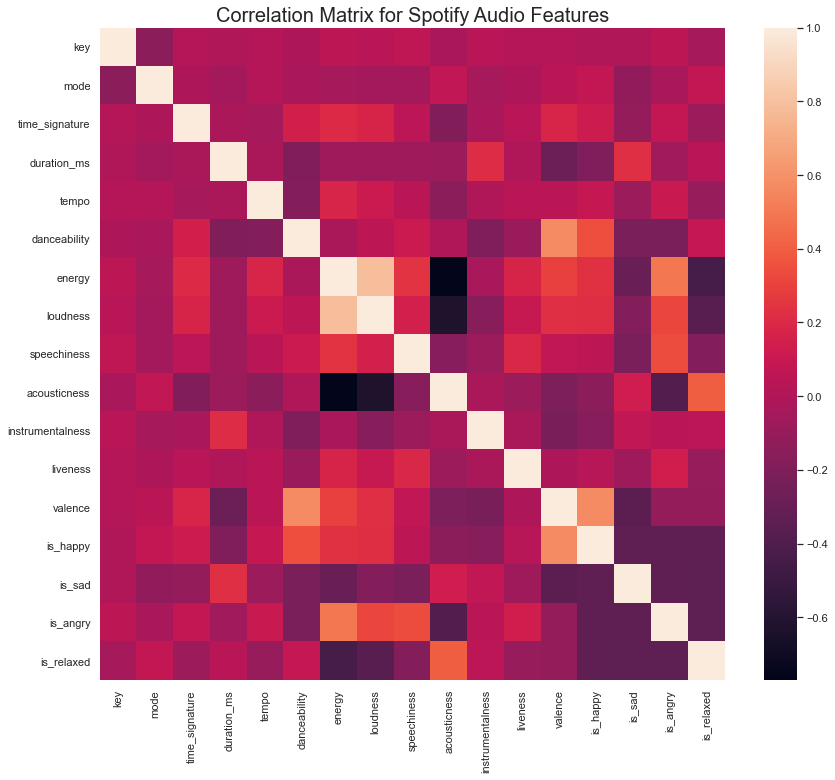

<Figure size 432x288 with 0 Axes>

In [188]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
corrMatrix = df.corr()
ax = sn.heatmap(corrMatrix)
# ax.xaxis.tick_top()
plt.title("Correlation Matrix for Spotify Audio Features", fontsize=20)
plt.show()

plt.savefig("Correlation Matrix.png")

In [89]:
false = np.where(y_pred != y_test)

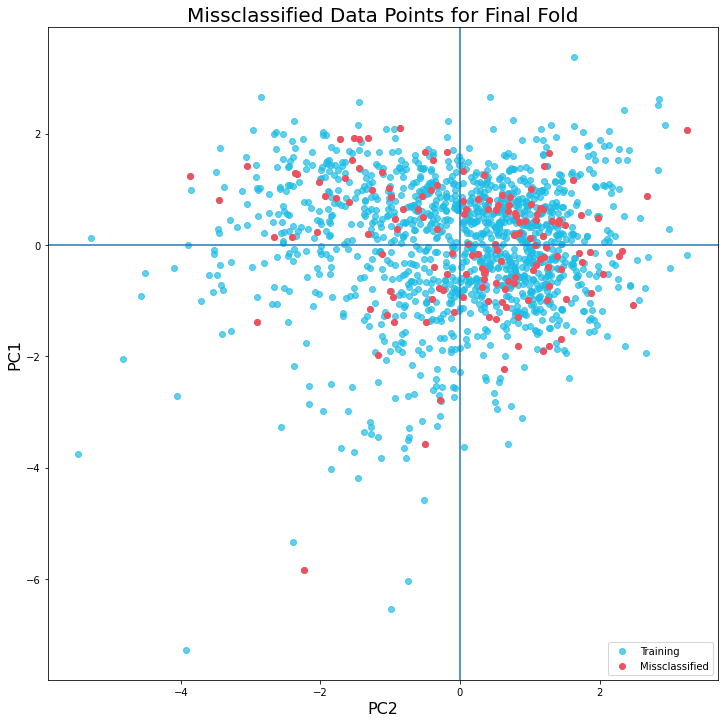

In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

tr = pca.fit_transform(X_train[:,1:]) * -1

plt.figure(figsize=(12, 12))
plt.scatter(tr[:, 0], tr[:, 1], label="Training", c="#1dbde6", alpha=0.7)
plt.scatter(tr[false, 0], tr[false, 1], label="Missclassified", c="#f1515e")

plt.axhline(0)
plt.axvline(0)
plt.xlabel("PC2", fontsize=16)
plt.ylabel("PC1", fontsize=16)
plt.title("Missclassified Data Points for Final Fold", fontsize=20)
plt.legend(loc='lower right')

plt.savefig("Missclassified.png")

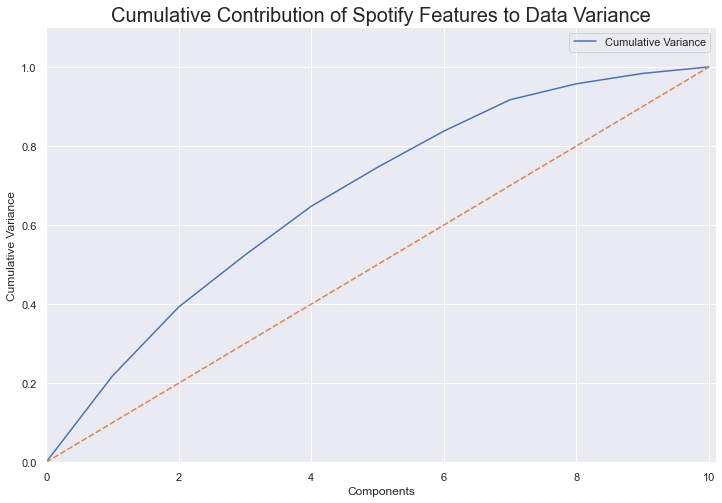

In [178]:
from sklearn.decomposition import PCA
pca = PCA()
sn.set()

tr = pca.fit_transform(X[:, 1:]) * -1
plt.figure(figsize=(12, 8))
x = range(0, 11)
y1 = np.hstack((0, np.cumsum(pca.explained_variance_ratio_)))
y2 = np.arange(0, 1.1, 0.1)

df = pd.DataFrame(np.c_[y1, y2], index=x, columns=["Cumulative Variance", ""])

sn.lineplot(data=df)
plt.ylim((0, 1.1))
plt.xlim((0, 10.1))

plt.title("Cumulative Contribution of Spotify Features to Data Variance", fontsize=20)
plt.xlabel("Components")
plt.ylabel("Cumulative Variance")

plt.savefig("graphs/cumvar.png")